In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/books-sales-and-ratings/Books_Data_Clean.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

This is using the book sales and ratings dataset from Kaggle. Let us get some insights from this dataset. This dataset is already clean so we do not need to do any data cleaning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [3]:
books = pd.read_csv("/kaggle/input/books-sales-and-ratings/Books_Data_Clean.csv")
column_names = list(books.columns)
print(column_names)

['index', 'Publishing Year', 'Book Name', 'Author', 'language_code', 'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre', 'gross sales', 'publisher revenue', 'sale price', 'sales rank', 'Publisher ', 'units sold']


Let us first see if this dataset needs any cleaning. Let's check for missing values or NaNs.

In [4]:
books.isna().sum()

index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

We have missing values or NaNs in this dataset, which means it needs some cleaning.

In [5]:
books = books.dropna(subset =['Publishing Year'] )

books['Book Name'].fillna("Unknown Title", inplace=True)

/tmp/ipykernel_17/2113103579.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books['Book Name'].fillna("Unknown Title", inplace=True)


I want to pose the question if Genre has an effect on Gross Sales or Units Sold. Let's see if our data is normally distributed.

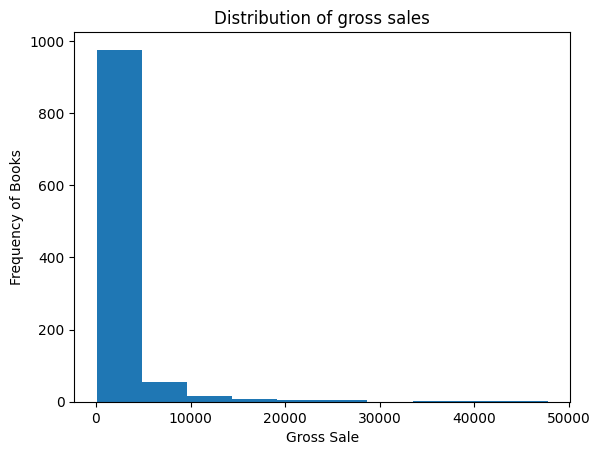

In [6]:
plt.title('Distribution of gross sales')
plt.xlabel('Gross Sale')
plt.ylabel('Frequency of Books')
plt.hist(books['gross sales'])
plt.show() 

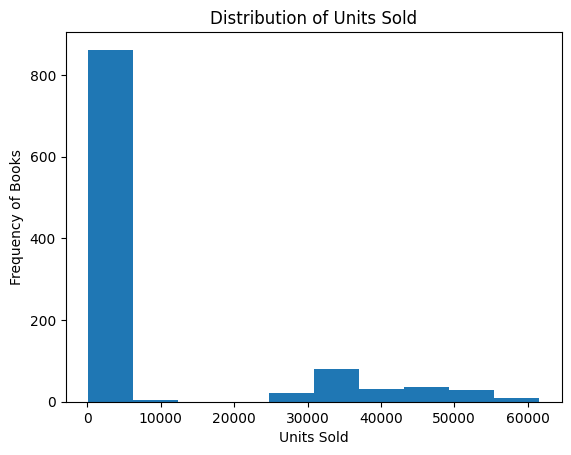

In [7]:
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency of Books')
plt.hist(books['units sold'])
plt.show() 

First insight I want to test is if genre effects the amount of gross sales. Our hypothesis is that genre does affect the amount of gross sales. Or genre does affect teh amount of units sold.

In [8]:
groups = books.groupby('genre')['units sold'].apply(list)
f_statistic, p_value = f_oneway(*groups)
print("f-statistic: ", f_statistic)
print("P-Value: ", p_value)

f-statistic:  2.286742865899192
P-Value:  0.07712722077399581


Since the p value is above 0.05, there isn't enough significant evidence to say that the genre affects gross sales.

In [9]:
group_sales = books.groupby('genre')['gross sales'].apply(list)
f_statistic2, p_value2 = f_oneway(*group_sales)
print("F-statistic: ", f_statistic2)
print("p value: ", p_value2)

F-statistic:  1.5190291183773832
p value:  0.20791739129177883


We can see that the p value is also more than 0.05 here, meaning there isn't enough significant evidence to say that the genre affects units sold.